# 소프트 마진 분류

## 소프트 마진 (Soft Margin) 분류
- 어느 정도의 오류를 허용하면서 가급적 최대 마진이 되는 초평면을 찾는다
- 이와 같이 소프트 마진 분류를 수행하는 선형 SVM을 서포트 벡터 분류기(support vector classifier)라고 한다
- 잘못 분류되는 데이터가 있지만 초평면을 찾을 수 있음
- 과대적합을 방지하거나 줄일 수 있음

![](../img/SVM_softmargin.png)

### 하이퍼파라미터 C(cost)를 이용하여 허용할 오류의 수준을 결정
- 즉, “원래 데이터와 다른 클래스로 분류되는 경우를 얼마나 많이 허용할 것인가”를 조정하는 규제 값
-  매개변수 C는 이론적으로 소프트 마진 분류를 위해 도입된 여유 변수(slack variable) ξ 의 값에 적용되는 변수

#### C의 값이 높은 경우, 오류에 대해서 더 엄격하게 적용
- 마진이 작아진다.
- 오분류율이 낮아진다.
- 과대적합이 될 수 있다.
![](../img/SVM_softmargin_lowC.png)

#### C의 값이 낮은 경우, 오류에 대해서 덜 엄격하게 적용
- 마진이 커진다.
- 오분류율이 높아진다.
- 과소적합이 될 수 있다.

![](../img/SVM_softmargin_highC.png)

## 사이킷런으로 선형 SVM (소프트 마진) 분류 수행

###  svm 모듈에 있는 LinearSVC를 또는 SVC를 이용하여 선형 SVM 객체를 생성

- 매개변수 C는 공통적으로 사용되며, 허용할 오류의 정도를 결정하는 하이퍼파라미터 값이다.
- 매개변수 loss는 LinearSVC에서만 사용되는 손실 함수이름이다. 기본값은 ‘squared_hinge’이며, 필요하다면 ‘hinge’로 변경한다.
- 매개변수 kernel은 SVC에서만 사용되는 커널 트릭의 이름이다. 기본값은 ‘rbf’이며, 선형 SVM에서는 ‘linear’로 변경하여 적용한다.

In [2]:
import sklearn.svm as svm
clf = svm.SVC(C=1, kernel='linear') # 어제 하드마진은 C가 없었음
# 근데 사실 C의 default값은 1임, 애초에 하드마진은 안됨
# 그래서 하드마진으로 하는척하면서도 소프트마진을 하는 중이었음

# ※ 아래와 같이 LinearSVC에서 loss=‘hinge’로 설정하여 생성
# 해도 의미적으로는 동일하지만, 적용된 구현 기법이 SVC와
# 다소 다르기 때문에 완전히 똑같은 결과가 나오지는 않는다
# clf = svm.LinearSVC(C=1, loss='hinge')

### 선형 SVM 객체에 대하여 fit 메소드를 이용하여 훈련한다.(붓꽃 데이터를 이용하였으며, 훈련 및 검증 데이터를 분리하지 않고 원본 데이터 전체를 학습에 사용하였다.)

In [4]:
import numpy as np
import sklearn.datasets as d
iris = d.load_iris()
X = iris.data[:,(2,3)]
y = (iris.target == 2).astype(np.int)

In [5]:
clf.fit(X,y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

### 실행 객체 또는 분류 모형에 대하여 predict 메소드를 이용하여 예측을 수행

In [6]:
X_test1 = [[5.5, 1.9]]
clf.predict(X_test1)

array([1])

In [7]:
X_test2 = [[4.7, 1.8]]
clf.predict(X_test2)

array([0])

### accuracy_score 함수 또는 score 메소드를 이용하여 정확도를 구한다

### C값에 따라서 결과가 달라진다

- 매개변수 C의 값을 변화시키면 마진의 너비가 달라지고,이에 따라 분류 결과도 달라지는 것을 확인할 수 있다
- 매개변수 C의 값을 변화시키면 마진의 너비가 달라지고, 이에 따라 분류 결과도 달라지는 것을 확인할 수 있다

---

## 다중 클래스 분류
- 다중 클래스 분류(multi-class classification)는 말 그대로,두 종류가 아닌 여러 개의 클래스를 분류하는 것을 의미
- 다항 분류(multinomial classification)라고도 한다
- 분석 기법에 따라서 이진 분류만 가능한 경우도 있고, 다항분류까지 가능한 경우도 있다
- 이진 분류만 가능한 방법이라도 이진 분류기 자체를 여러 개 조합하여 다항 분류를 수행할 수 있음

### OvO (One-Vs-One) 전략
- K개 클래스에 대하여 **2개의 클래스 조합을 선택**하여 분류하는 과정을 모든 조합에 대해서 수행
- 각 분류를 통해서 **판별된 결과를 기반으로 가장 많은 결과 값을 획득한 클래스를 최종 결과로 선택**

- 예) 클래스가 4종류일 때 (A, B, C, D)
![](../img/SVM_OvO.png)

### OvA 또는 OvR (One-Vs-All 또는 One-Vs-Rest) 전략
- K개 클래스에 대하여 각 클래스 별로 소속 여부를 판별하는 분류를 수행
- 각 분류를 통해서 판별된 결과를 기반으로 가장 많은 결과 값을 획득한 클래스를 최종 결과로 선택
- 예) 클래스가 4종류일 때 (A, B, C, D)
- 근데 여기서 이건 A,B 통과해버리면 다른 방식으로 점수 계산을 해야한다
![](../img/SVM_OvA.png)

### 선형 SVM의 다중 클래스 분류
- SVM은 기본적으로 이진 분류기이지만, OvO 전략을 적용하여 다항 분류를 수행
- 별도의 설정은 필요 없으며, 데이터가 다중 클래스로 구성되어 있으면 자동적으로 OvO 방식으로 분류가 수행

In [8]:
import sklearn.datasets as d
iris = d.load_iris()
X = iris.data[:,(2,3)]
y = iris.target

- 이후의 과정은 이진 분류의 경우와 동일하게 진행하면 됨

In [9]:
import sklearn.model_selection as ms
import sklearn.svm as svm
import sklearn.metrics as mt

In [10]:
X_train, X_test, y_train, y_test = ms.train_test_split(X,y,test_size=0.3, random_state = 0)

In [11]:
clf = svm.SVC(kernel='linear').fit(X_train, y_train)

In [12]:
y_pred = clf.predict(X_test)

In [14]:
score = mt.accuracy_score(y_test,y_pred)
print("정확도 : ",round(score,3))

정확도 :  0.978


- 붓꽃 데이터의 다중 클래스 분류를 수행한 결과
- SVC -> OvO 전략
    - setosa vs versicolor   => coef_[0]
    - versicolor vs viginica => coef_[1]
    - setosa vs viginica     => coef_[2]

In [23]:
import matplotlib.pyplot as plt

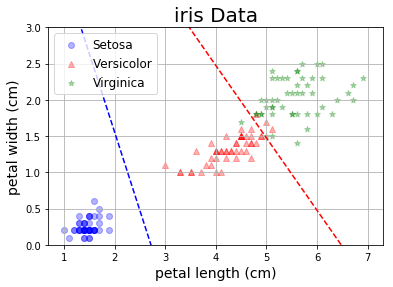

In [33]:
c_set = ['blue','red','green']
m_set = ['o','^','*']
l_set = ['Setosa','Versicolor','Virginica']

xx = np.linspace(1,7)
yy0 = -(clf.coef_[0][0] / clf.coef_[0][1]) * xx - clf.intercept_[0] / clf.coef_[0][1]
# yy1 = -(clf.coef_[1][0] / clf.coef_[1][1]) * xx - clf.intercept_[1] / clf.coef_[1][1]
yy2 = -(clf.coef_[2][0] / clf.coef_[2][1]) * xx - clf.intercept_[2] / clf.coef_[2][1]

for t in set(y):
    x_pts = [X[i,0] for i in range(len(y)) if y[i] == t]
    y_pts = [X[i,1] for i in range(len(y)) if y[i] == t]
    plt.scatter(x_pts,y_pts,color=c_set[t],marker=m_set[t],label=l_set[t],alpha=0.3)

plt.plot(xx, yy0, color='blue', linestyle='--')
# plt.plot(xx, yy1, color='green', linestyle='--')
plt.plot(xx, yy2, color='red', linestyle='--')

plt.xlabel(iris.feature_names[2],fontsize=14)
plt.ylabel(iris.feature_names[3],fontsize=14)
plt.legend(loc=2,fontsize=12)
plt.ylim(0,3)
plt.title('iris Data',fontsize=20)
plt.grid()
plt.show()

## 다중 클래스 분류 예제 - wine 데이터

In [134]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_wine
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [119]:
wine = load_wine()
wine.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [120]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [121]:
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [122]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [123]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [124]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [125]:
wine_df = pd.DataFrame(wine.data,columns=wine.feature_names)
wine_df['class'] = wine.target
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735.0,0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450.0,0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290.0,0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295.0,0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045.0,0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045.0,0


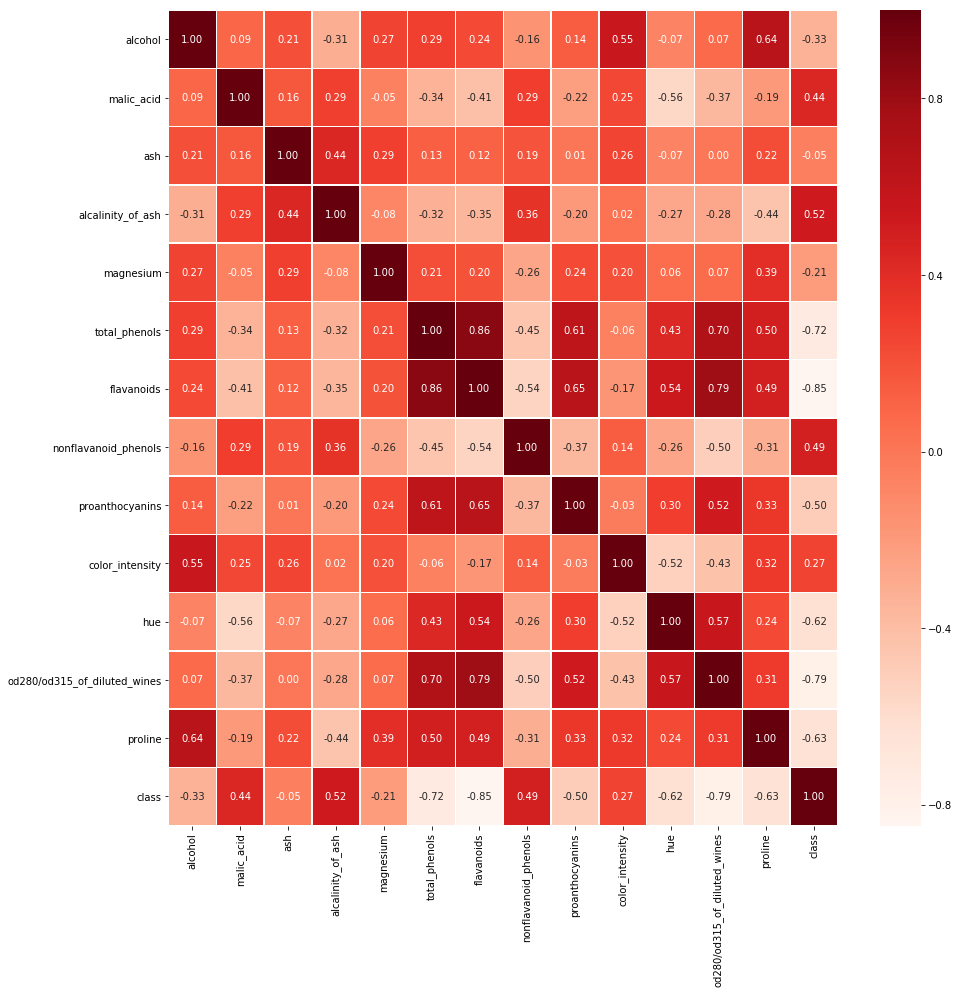

In [126]:
plt.figure(figsize=(15,15))
sns.heatmap(data = wine_df.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Reds')
plt.show()

In [136]:
X = wine.data
y = wine.target
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=0)

clf = SVC(C=1, kernel='linear').fit(X_train,y_train) # 선형도 되고, 비선형도 되니까 활용도가 좋아서 이걸 주로 쓰자

y_pred = clf.predict(X_test)

score = accuracy_score(y_test,y_pred)

print("Accuracy : ", round(score, 3))

print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

Accuracy :  0.981
[[19  0  0]
 [ 0 21  1]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.95      0.98        22
           2       0.93      1.00      0.96        13

   micro avg       0.98      0.98      0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

